In [31]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from panel.interact import interact
from dotenv import load_dotenv
%matplotlib inline

In [32]:
load_dotenv()
mapbox_token = os.getenv("MAPBOX_KEY_ID")
px.set_mapbox_access_token(mapbox_token)

In [33]:
file1_path = Path("/Users/ameerirfan/Desktop/FinTech_Bootcamp/FinTech-BTC-Personal-Projects/Unit_6/sfo_neighborhoods_census_data.csv")
sfo_neighborhoods_df = pd.read_csv(file1_path, index_col="year")
sfo_neighborhoods_df.head

<bound method NDFrame.head of                 neighborhood  sale_price_sqr_foot  housing_units  gross_rent
year                                                                        
2010            Alamo Square           291.182945         372560        1239
2010              Anza Vista           267.932583         372560        1239
2010                 Bayview           170.098665         372560        1239
2010        Buena Vista Park           347.394919         372560        1239
2010        Central Richmond           319.027623         372560        1239
...                      ...                  ...            ...         ...
2016          Telegraph Hill           903.049771         384242        4390
2016              Twin Peaks           970.085470         384242        4390
2016  Van Ness/ Civic Center           552.602567         384242        4390
2016       Visitacion Valley           328.319007         384242        4390
2016           Westwood Park           631.195

In [34]:
housing_units= sfo_neighborhoods_df.groupby('year').mean()

housing_units.drop(['sale_price_sqr_foot', 'gross_rent'], axis=1)

,housing_units
year,
2010,372560.0
2011,374507.0
2012,376454.0
2013,378401.0
2014,380348.0
2015,382295.0
2016,384242.0


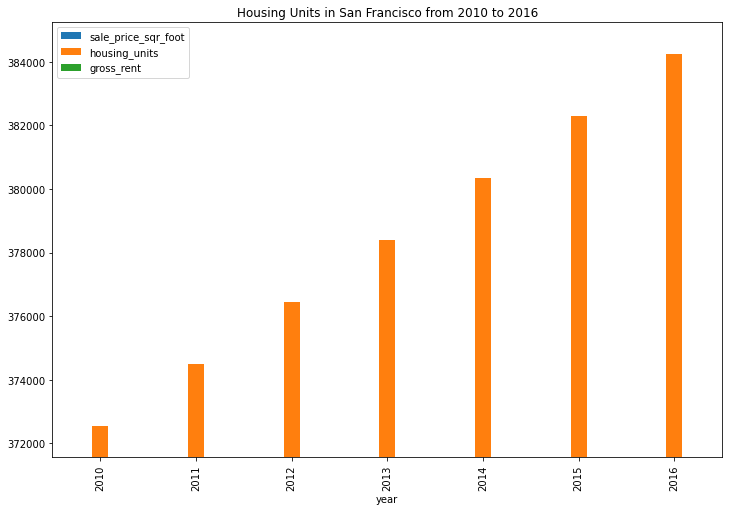

In [35]:
min = housing_units.min()['housing_units']
max = housing_units.max()['housing_units']
housing_units.plot.bar(ylim =(min-1000, max+1000),title="Housing Units in San Francisco from 2010 to 2016",figsize=(12,8))

plt.show()
plt.close('housing_units')

In [36]:
avg_rent_sqft = sfo_neighborhoods_df["gross_rent"].groupby([sfo_neighborhoods_df.index]).mean()
avg_rent_sqft

year
2010    1239.0
2011    1530.0
2012    2324.0
2013    2971.0
2014    3528.0
2015    3739.0
2016    4390.0
Name: gross_rent, dtype: float64

<AxesSubplot:title={'center':'Average Gross Rent from 2010 to 2016'}, xlabel='year'>

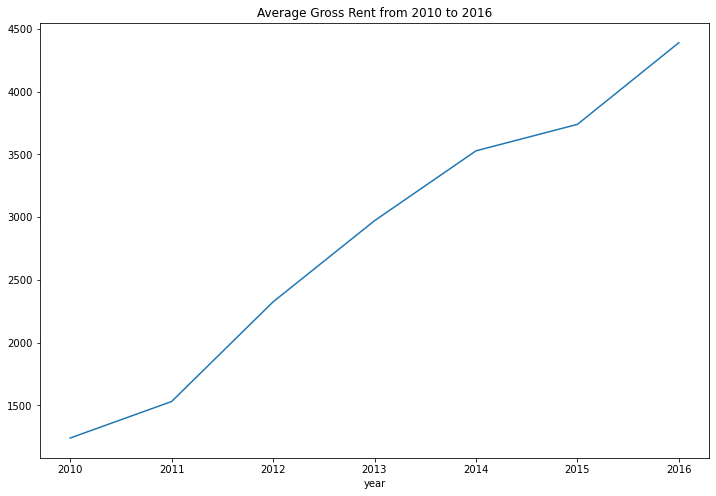

In [37]:
avg_rent_sqft.plot.line(title="Average Gross Rent from 2010 to 2016",figsize=(12,8))

<AxesSubplot:title={'center':'Average Sales Price per Square Foot within San Francisco'}, xlabel='year'>

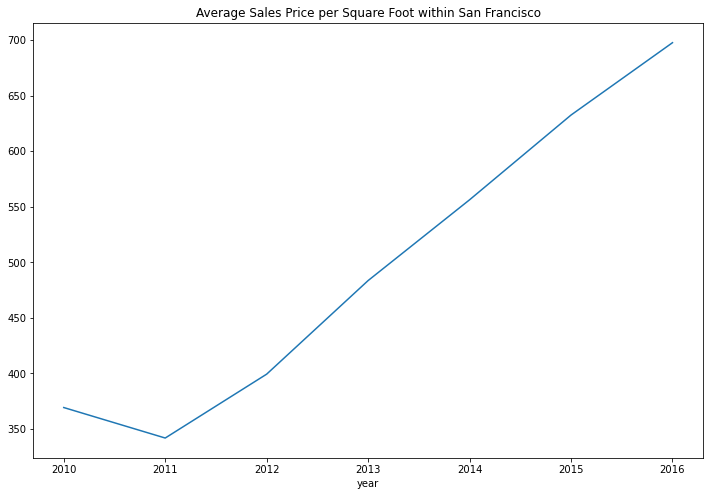

In [38]:
avg_price_sqft = sfo_neighborhoods_df["sale_price_sqr_foot"].groupby([sfo_neighborhoods_df.index]).mean()
avg_price_sqft.plot(title = "Average Sales Price per Square Foot within San Francisco",figsize=(12,8))

In [39]:
new_data_sf = sfo_neighborhoods_df.groupby([sfo_neighborhoods_df.index, "neighborhood"]).mean()
sf_sales = new_data_sf["sale_price_sqr_foot"]
prices_square_foot_by_year_df = pd.DataFrame(sf_sales).reset_index()
prices_square_foot_by_year_df.head()

,year,neighborhood,sale_price_sqr_foot
0,2010,Alamo Square,291.182945
1,2010,Anza Vista,267.932583
2,2010,Bayview,170.098665
3,2010,Buena Vista Park,347.394919
4,2010,Central Richmond,319.027623


In [40]:
def choose_nghbrhood(neighborhood):

    
    
    return prices_square_foot_by_year_df.loc[prices_square_foot_by_year_df['neighborhood']==neighborhood,:].hvplot.line(
        x="year",
        y="sale_price_sqr_foot",
        colormap="viridis",
        title="San Francisco Sale per Square foot per Year",
    )

neighborhood_choice = prices_square_foot_by_year_df["neighborhood"]

interact(choose_nghbrhood, neighborhood=neighborhood_choice)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive02606')

In [41]:
avg_value_neighborhood_df = sfo_neighborhoods_df.groupby([sfo_neighborhoods_df["neighborhood"]]).mean()
avg_value_neighborhood_df = avg_value_neighborhood_df.reset_index()
avg_value_neighborhood_df.head(10)

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333
5,Buena Vista Park,452.680591,378076.5,2698.833333
6,Central Richmond,394.422399,378401.0,2817.285714
7,Central Sunset,423.687928,378401.0,2817.285714
8,Clarendon Heights,487.244886,376454.0,2250.500000
9,Corona Heights,587.539067,377232.8,2472.000000


In [42]:
file2_path = Path("/Users/ameerirfan/Desktop/FinTech_Bootcamp/FinTech-BTC-Personal-Projects/Unit_6/neighborhoods_coordinates.csv")

In [43]:
neighborhood_coordinates_df = pd.read_csv(file2_path)
neighborhood_coordinates_df.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [44]:
complete_neighborhood_df = pd.concat([avg_value_neighborhood_df, neighborhood_coordinates_df], axis="columns", join="inner")
complete_neighborhood_df.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Neighborhood,Lat,Lon
0,Alamo Square,366.020712,378401.0,2817.285714,Alamo Square,37.791012,-122.402100
1,Anza Vista,373.382198,379050.0,3031.833333,Anza Vista,37.779598,-122.443451
2,Bayview,204.588623,376454.0,2318.400000,Bayview,37.734670,-122.401060
3,Bayview Heights,590.792839,382295.0,3739.000000,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,576.746488,379374.5,3080.333333,Bernal Heights,37.728630,-122.443050


In [45]:
complete_neighborhood_df.drop(columns=['Neighborhood'])
complete_neighborhood_df.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Neighborhood,Lat,Lon
0,Alamo Square,366.020712,378401.0,2817.285714,Alamo Square,37.791012,-122.402100
1,Anza Vista,373.382198,379050.0,3031.833333,Anza Vista,37.779598,-122.443451
2,Bayview,204.588623,376454.0,2318.400000,Bayview,37.734670,-122.401060
3,Bayview Heights,590.792839,382295.0,3739.000000,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,576.746488,379374.5,3080.333333,Bernal Heights,37.728630,-122.443050


In [55]:
map_plot = px.scatter_mapbox(
    complete_neighborhood_df,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    color_continuous_scale=px.colors.cyclical.IceFire,
    size_max=15,
    zoom=11,
    width=800,
    hover_name="Neighborhood",
    title="Average Price/Square Foot and Gross Rent in San Francisco",
)

map_plot.show()
